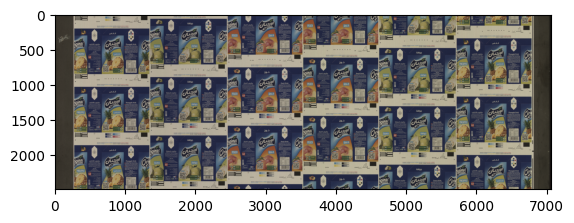

In [17]:
import os
from skimage import io
from matplotlib import pyplot as plt
path = '/Users/USER/Desktop/HACKATHON/data/Job1.bmp'
im = io.imread(os.path.join(path))

plt.imshow(im)

In [2]:
import fitz  # PyMuPDF
import os

def pdf_to_jpg(pdf_path, output_folder):
    pdf_document = fitz.open(pdf_path)
    
    for page_number in range(pdf_document.page_count):
        page = pdf_document[page_number]
        image = page.get_pixmap()
        
        jpg_filename = os.path.join(output_folder, f'page_{page_number + 1}.jpg')
        image.save(jpg_filename)
    
    pdf_document.close()

# Usage example
pdf_path = '/Users/USER/Desktop/HACKATHON/samples/SA-A067.pdf'  # Replace 'input.pdf' with the path to your PDF file
output_folder = '/Users/USER/Desktop/HACKATHON/samples_images'  # Output folder where JPG images will be saved
os.makedirs(output_folder, exist_ok=True)

pdf_to_jpg(pdf_path, output_folder)




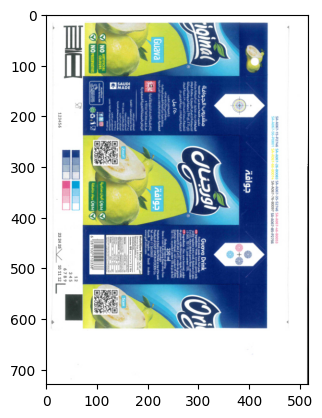

Processing complete. Result saved as output_image.jpg


In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/Users/USER/Desktop/HACKATHON/samples_images/page_1.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Otsu's thresholding
_, thresholded = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Find contours in the thresholded image
contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours based on area (adjust min_area_threshold based on your image)
min_area_threshold = 1000
filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area_threshold]

# Create a mask with the same dimensions as the original image
mask = np.zeros_like(image)

# Draw filtered contours on the mask
cv2.drawContours(mask, filtered_contours, -1, (255, 255, 255), thickness=cv2.FILLED)

# Use the mask to remove regions from the original image
result_image = cv2.bitwise_and(image, mask)

# Save the result
cv2.imwrite('output_image.jpg', result_image)

# Display the output image
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.show()

print("Processing complete. Result saved as output_image.jpg")
